<a href="https://colab.research.google.com/github/bigirimanainnocent12/Test-T-de-student-pour-deux-chantillons-ind-pendants/blob/main/Test_T_de_Student_Pour_Deux_%C3%A9chantillons_Ind%C3%A9pendants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## ***1. Introduction***


Récemment arrivée en Alsace, Alice souhaite mieux connaître les traditions locales. Elle entend parler de Manele et de Manala mais ne sait pas faire la difference. Elle se demande si il s’agit d’une différence de poids et se motive à répondre scientifiquement à cette interrogation. Pour cela, elle sélectionne au hasard un certain nombre d’artisans boulangers sur l’ensemble de l’Alsace. Elle leur achète, à tous, une unique brioche en forme de bonhomme. Elle pèse chacune d’entre elles en utilisant la même balance. Elle stocké les données dans le fichier man.csv. L’unité de mesure utilisée est le gramme (g). Faites le traitement statistique adéquat pour répondre à la question d’Alice.


Pour répondre à la question d'Alice, il faut effectuer une analyse comparative des poids des Manala et des Manele. Pour cela, commençons à décrire les deux séries des données par des Statistiques descriptives.



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Importatiobs de la base de données***

In [44]:
df=pd.read_csv('/content/drive/MyDrive/Données/Man.csv',sep=";")
df.head()

,Manele,Manala
0,"110,4","116,98"
1,"116,36","121,31"
2,"117,95","131,22"
3,"101,85","113,17"
4,"111,1","105,62"


# ***Statistiques descriptives***

In [45]:
Manala=df['Manala'].str.replace(',','.').astype(float)
Manele=df['Manele'].str.replace(',','.').astype(float)

Pour la variable Manala

In [46]:
Manala.describe().round(2)

,Manala
count,24.00
mean,112.39
std,8.12
min,94.41
25%,106.74
50%,111.22
75%,117.19
max,131.22


Pour la variable Manele

In [47]:
Manele.describe().round(2)

,Manele
count,27.00
mean,110.39
std,6.69
min,96.62
25%,106.43
50%,110.40
75%,114.87
max,124.27


Nous constatons qu’il y a un écart de 2g entre les poids moyens de ces deux catégories. Nous devons donc tester si cette différence est statistiquement significative.

# ***Les hypothéses du test***
Soient:
$\mu_1$= La moyenne des poids pour la catégorie Manele;

$\mu_2$= La moyenne des poids pour la catégorie Manala.

Pour répondre à la question d'Alice, nous devons effectuer un test statistique pour déterminer s'il y a une différence significative de poids entre les brioches Manele et Manala. Pour cela, nous formulons les hypothèses suivantes:

$H_0$ : Il n'y a pas de différence significative de poids entre les brioches Manele et Manala. Donc $\mu_1$=$\mu_2$

$H_1$ : Il y a une différence significative de poids entre les brioches Manele et Manala. Donc $\mu_1$$\neq$$\mu_2$


# ***Choix du test***


Une approche possible pour répondre à la question d'Alice serait d'utiliser un test statistique de comparaison de deux moyennes. Dans ce cas, nous allons utiliser un test t de Student pour deux échantillons indépendants.

# ***Choix du seuil***

Pour déterminer le seuil à utiliser dans cette analyse, il est important de comprendre le contexte et la question posée par Alice. L'objectif d'Alice est de connaître la différence entre les Manele et les Manala en termes de poids. Pour choisir le seuil pour cette analyse, nous devons déterminer le niveau de confiance désiré. Un niveau de confiance de 95% est généralement utilisé dans ce type d'analyse. Cela signifie que nous voulons être sûr à 95% que la différence de poids observée n'est pas due au hasard.

# ***Conditions d’application du test***

1.  Alice a sélectionnée au hasard un certain nombre d’artisans boulangers sur le territoire alsacien. Elle leur acheté à tous, une unique brioche en forme de bonhomme. Ce qui garanti que Les observations sont indépendantes entre les deux échantillons.

2.  Test de Shapiro-Wilk

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données suit une distribution normale.

Les hypothèses du test sont les suivantes :

$H_0$ : L’échantillon est issu d’une population normalement distribuée.

$H_0$ : L’échantillon n’est pas issu d’une population normalement distribuée.

Le choix du seuil dépend de la tolérance à l'erreur de type I (rejeter à tort l'hypothèse nulle) que l'on est prêt à accepter. Le seuil le plus couramment utilisé est $\alpha$= 0,05.

**Résultats du test de Shapiro-wilk: pour la catégoire Manele**

In [48]:
from scipy.stats import shapiro
stat,p=shapiro(Manele)
dicte={'Statistique de test':stat,'P-Value':p}
test=pd.DataFrame(dicte,index=["Shapiro-Wilk"])
test

,Statistique de test,P-Value
Shapiro-Wilk,0.991131,0.997122


La statistique de décision vaut 0,991. La p-value=0,997 donc supérieur à 0,05. On rejette $H_1$ au profit de $H_0$ et nous concluons que la variable Manele est issue d’une population normalement distribuée.

**Résulttas du test de Shapiro-Wilk pour la variable Manala**

In [49]:
stat1,p1=shapiro(Manala.dropna())
dicte1={'Statistique de test':stat1,'P-Value':p1}
test1=pd.DataFrame(dicte1,index=["Shapiro-Wilk"])
test1

,Statistique de test,P-Value
Shapiro-Wilk,0.962941,0.500302


La statistique de décision vaut 0,963. La p-value=0,50, donc supérieur à 0,05. On rejette $H_1$ au profit de $H_0$ et nous concluons que la variable Manala est issue d’une population normalement distribuée.

Si nous essayons de tracer la droite de Henry de ces deux variables, nous remarquons que la majorité des points paraissent alignés sur la droite de Henry. Ce qui nous permets également de conclure que les deux variables Manele et Manala proviennent des populations normalement distribuées.

# **Manala**

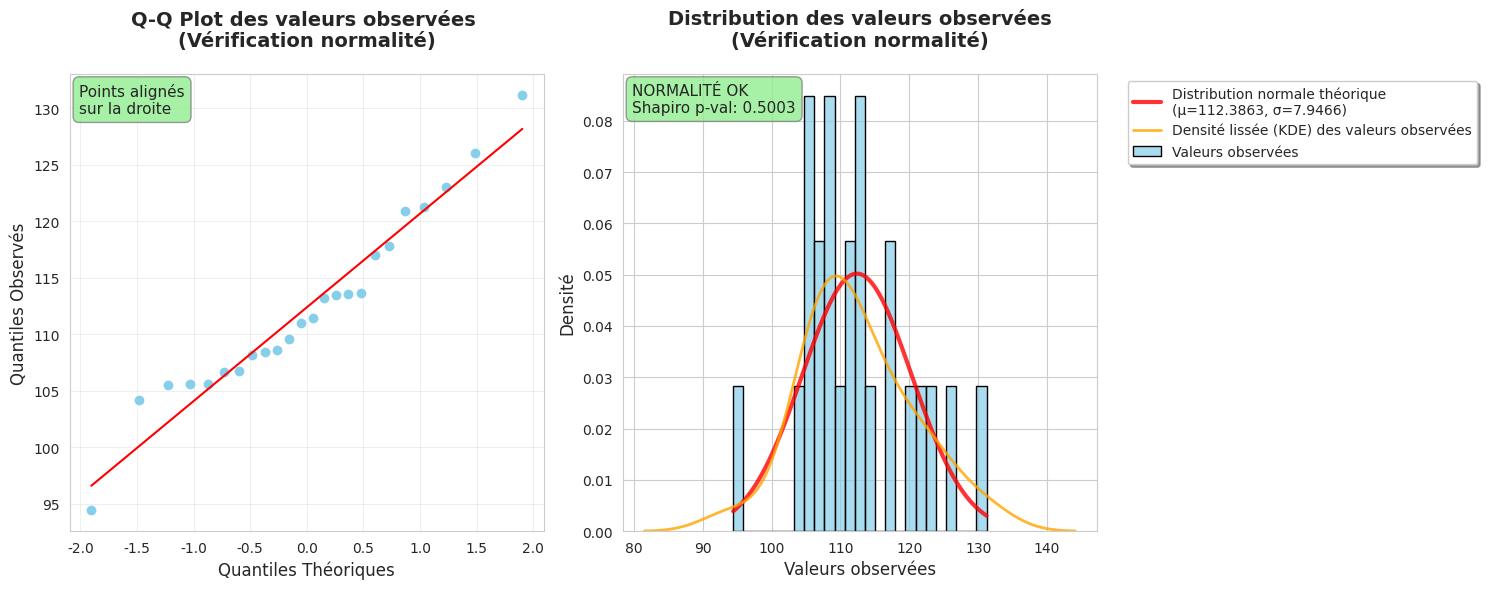

In [50]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec scipy pour contrôler les couleurs
from scipy.stats import probplot
probplot(Manala.dropna(), dist="norm", plot=axes[0])

# Changer les couleurs des points et de la ligne
axes[0].get_lines()[0].set_markerfacecolor('skyblue')
axes[0].get_lines()[0].set_markeredgecolor('skyblue')
axes[0].get_lines()[1].set_color('red')

axes[0].set_title('Q-Q Plot des valeurs observées \n(Vérification normalité)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
axes[0].set_ylabel('Quantiles Observés', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(Manala.dropna())

# Ajout d'une interprétation avec style Seaborn
if shapiro_pvalue > 0.05:
    interpretation_qq = "Points alignés\nsur la droite"
    box_color = "lightgreen"
else:
    interpretation_qq = "Déviations\nnotables"
    box_color = "lightcoral"

axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color, alpha=0.8, edgecolor='gray'))

# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS AVEC SEABORN (POSITION 1)
# =============================================================================

# Histogramme avec Seaborn - plus esthétique
sns.histplot(data=Manala.dropna(), bins=25, stat='density', alpha=0.7,
             color='skyblue', edgecolor='black', ax=axes[1],
             label='Valeurs observées')

axes[1].set_title('Distribution des valeurs observées\n(Vérification normalité)',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Valeurs observées', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(Manala.dropna()), np.std(Manala.dropna())
x_norm = np.linspace(Manala.dropna().min(), Manala.dropna().max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Ligne de distribution normale avec style Seaborn
axes[1].plot(x_norm, y_norm, color='red', linewidth=3,
             label=f'Distribution normale théorique\n(μ={mu:.4f}, σ={sigma:.4f})', alpha=0.8)

# Ajout optionnel d'une courbe KDE pour les résidus
sns.kdeplot(data=Manala.dropna(), color='orange', linewidth=2,
            alpha=0.8, ax=axes[1], label='Densité lissée (KDE) des valeurs observées')

# Légende positionnée à l'extérieur du graphique (à droite)
axes[1].legend(fontsize=10, frameon=True, fancybox=True, shadow=True,
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Interprétation avec couleurs conditionnelles
if shapiro_pvalue > 0.05:
    interpretation_dist = "NORMALITÉ OK"
    box_color_dist = "lightgreen"
else:
    interpretation_dist = "NON-NORMALITÉ"
    box_color_dist = "lightcoral"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color_dist, alpha=0.8, edgecolor='gray'))

# Style final
plt.tight_layout()
plt.savefig('test_normality_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# **Manele**

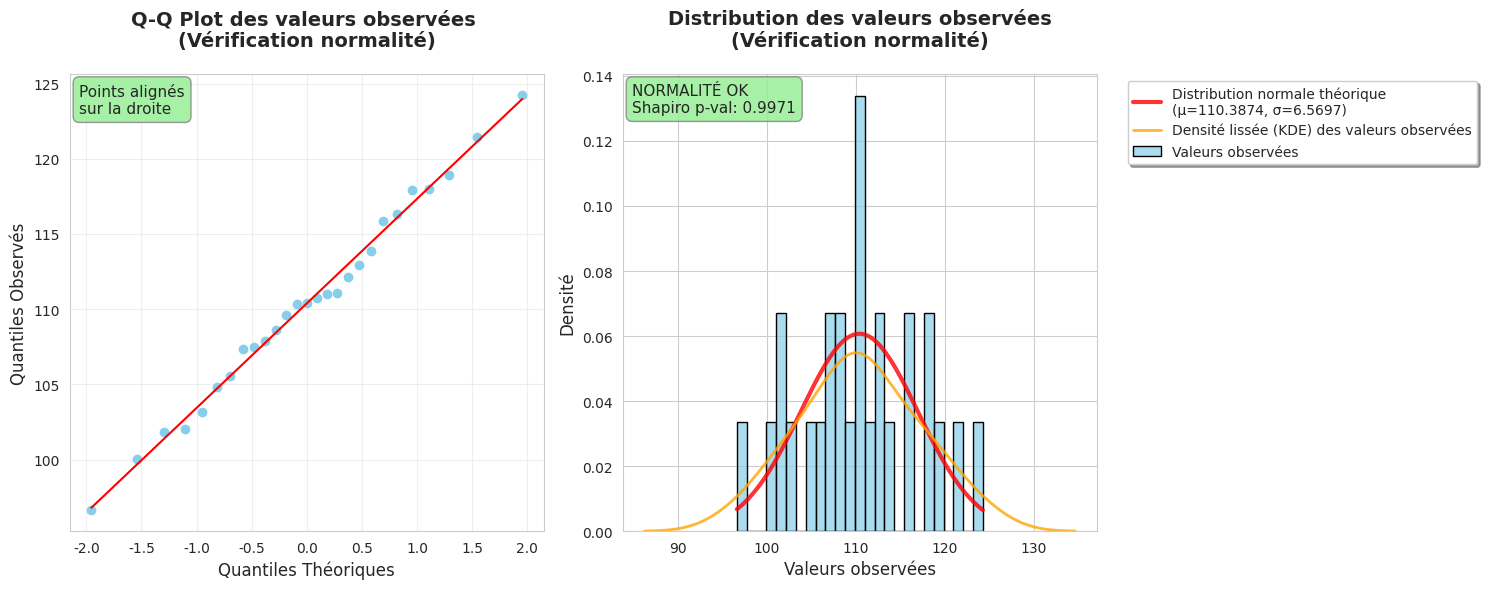

In [51]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec scipy pour contrôler les couleurs
from scipy.stats import probplot
probplot(Manele, dist="norm", plot=axes[0])

# Changer les couleurs des points et de la ligne
axes[0].get_lines()[0].set_markerfacecolor('skyblue')
axes[0].get_lines()[0].set_markeredgecolor('skyblue')
axes[0].get_lines()[1].set_color('red')

axes[0].set_title('Q-Q Plot des valeurs observées \n(Vérification normalité)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
axes[0].set_ylabel('Quantiles Observés', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(Manele)

# Ajout d'une interprétation avec style Seaborn
if shapiro_pvalue > 0.05:
    interpretation_qq = "Points alignés\nsur la droite"
    box_color = "lightgreen"
else:
    interpretation_qq = "Déviations\nnotables"
    box_color = "lightcoral"

axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color, alpha=0.8, edgecolor='gray'))

# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS AVEC SEABORN (POSITION 1)
# =============================================================================

# Histogramme avec Seaborn - plus esthétique
sns.histplot(data=Manele, bins=25, stat='density', alpha=0.7,
             color='skyblue', edgecolor='black', ax=axes[1],
             label='Valeurs observées')

axes[1].set_title('Distribution des valeurs observées\n(Vérification normalité)',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Valeurs observées', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(Manele), np.std(Manele)
x_norm = np.linspace(Manele.min(), Manele.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Ligne de distribution normale avec style Seaborn
axes[1].plot(x_norm, y_norm, color='red', linewidth=3,
             label=f'Distribution normale théorique\n(μ={mu:.4f}, σ={sigma:.4f})', alpha=0.8)

# Ajout optionnel d'une courbe KDE pour les résidus
sns.kdeplot(data=Manele, color='orange', linewidth=2,
            alpha=0.8, ax=axes[1], label='Densité lissée (KDE) des valeurs observées')

# Légende positionnée à l'extérieur du graphique (à droite)
axes[1].legend(fontsize=10, frameon=True, fancybox=True, shadow=True,
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Interprétation avec couleurs conditionnelles
if shapiro_pvalue > 0.05:
    interpretation_dist = "NORMALITÉ OK"
    box_color_dist = "lightgreen"
else:
    interpretation_dist = "NON-NORMALITÉ"
    box_color_dist = "lightcoral"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color_dist, alpha=0.8, edgecolor='gray'))

# Style final
plt.tight_layout()
plt.savefig('test_normality_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

3.  Test de Fisher-Snedecor d’égalité de 2 variances

Le test de Fisher-Snedecor (appelé aussi test de Fisher ou test F) est un test statistique utilisé pour comparer les variances de deux échantillons indépendants. Les hypothéses du test sont:

$H_0$ : Les deux échantillons ont des variances égales.

$H_1$ : Les deux échantillons ont des variances différentes.

Résultats du Test

In [52]:
Varriance_manele=np.var(Manele,ddof=1)
Varriance_manala=np.var(Manala.dropna(),ddof=1)

if Varriance_manele>Varriance_manala:

  F=Varriance_manele/Varriance_manala
  ddn=len(Manele)-1
  ddd=len(Manala.dropna())-1
  p=(1-stats.f.cdf(F,ddn,ddd))*2
  print('stat=%.3f, p_value=%.3f,ddn=%.0f,ddd=%.0f' % (F,p,ddn,ddd))
else:
  F=Varriance_manala/Varriance_manele
  ddn=len(Manala.dropna())-1
  ddd=len(Manele)-1
  p=(1-stats.f.cdf(F,ddn,ddd))*2
  print('stat=%.3f, p_value=%.3f,ddn=%.0f,ddd=%.0f' % (F,p,ddn,ddd))

stat=1.470, p_value=0.341,ddn=23,ddd=26



La valeur de la statistique du test de Fisher-Snedecor=1,47. Sous $H_0$, elle suit une loi de Fisher-Snedecor de paramètres 23 et 26. La p-value est égale à 0,341 supérieur à 0,05. Donc on accepte $H_0$ et nous concluons que les deux échantillons ont une même variance.

Toutes les conditions d’application du test t de Student pour deux échantillons indépendants sont vérifiées. Donc nous pouvons maintenant effectuer le test pour répondre à la question d’Alice.


# **Résultats du test t de Student pour deux échantillons indépendants**

In [53]:
A,B=stats.ttest_ind(Manele,Manala.dropna())
# Calcul des degrés de liberté
ddl = len(Manele) + len(Manala.dropna()) - 2
dicte_ttest_ind={'Statistique de test':A,'P-Value':B,'Degrés de liberté': [ddl]}
ttest_ind=pd.DataFrame(dicte_ttest_ind,index=["Test t de Student"])
ttest_ind

,Statistique de test,P-Value,Degrés de liberté
Test t de Student,-0.963247,0.340153,49


La statistique de décision vaut 0,96325. Sous $H_0$, elle suit une loi de Student à 49 degrés de libertés. La p-value=0.3402 supérieur à 0,05. On accepte $H_0$ et nous concluons qu’il n’y a pas de différence significative de poids entre Manala et Manele. Cela signifie que les données ne montrent pas de différence claire et statistiquement significative dans le poids entre ces deux groupes, selon l'analyse effectuée.

# **Conclusion**
Pour aider Alice à distinguer les deux brioches, elle pourrait rassembler des données supplémentaires pour augmenter les tailles des échantillons, ce qui peut aider à détecter des différences si elles existent réelement. De plus, elle peut approfondir ses recherches sur les traditions alsaciennes qui pourraient également être nécessaires pour avoir une réponse complète à la question d'Alice.

# ***2. Introduction***

L’objectif est de déterminer si la nouvelle molécule expérimentée par une entreprise pharmaceutique est efficace pour faire baisser une mesure physiologique chez des patients atteints d'une pathologie. Pour cela, 54 patients sans lien de parenté ont été répartis aléatoirement en deux groupes : un groupe recevant la nouvelle molécule (traitement A) et un groupe recevant un placebo (traitement B). Les groupes ont été constitués de manière à ce que les distributions de l'âge et du sexe soient similaires dans les deux groupes. L’analyse des moyennes et des écarts-types dans chacun des groupes permettra d’évaluer l'efficacité de la molécule testée et de déterminer si elle a un impact significatif sur la mesure physiologique étudiée.

# ***Statistiques descriptives***

Les statistiques descriptives permettent de résumer et de décrire les caractéristiques d'un ensemble de données. Ces méthodes incluent généralement la moyenne, la médiane, l'écart-type, la variance, les quartiles et d'autres mesures de dispersion et de tendance centrale.

En résumé, les statistiques descriptives fournissent des informations utiles sur la répartition et les caractéristiques des données, ce qui peut être précieux pour prendre des décisions éclairées.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df = pd.read_csv('/content/drive/MyDrive/Données/molecule.csv')
df.head()

,individu,mesure,traitement
0,1,76.98,A
1,2,75.85,A
2,3,88.37,A
3,4,86.79,A
4,5,51.04,A


**Pour le traitement A:**

In [56]:
df[df['traitement']=='A'].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
individu,27.0,14.00,7.94,1.00,7.50,14.00,20.50,27.00
mesure,27.0,78.84,11.14,51.04,74.22,78.22,86.34,99.27


**Pour le traitement B:**

In [57]:
df[df['traitement']=='B'].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
individu,27.0,41.00,7.94,28.00,34.50,41.00,47.50,54.00
mesure,27.0,65.75,12.42,41.09,59.84,64.73,73.29,91.27


# ***Les hypothèses du test sont***

$H_0$ : La nouvelle molécule n'a pas d'effet sur la mesure physiologique des patients.

$H_1$ : La nouvelle molécule est efficace pour faire augmenter la mesure physiologique chez les patients atteints de la pathologie.

# ***Choix du test***


Pour déterminer si la molécule testée est efficace, on peut réaliser un test de comparaison de moyennes entre les deux groupes (traitement A et traitement B) pour la mesure physiologique étudiée. Pour cela, on peut utiliser un test t de Student unilatéral supérieur.

# ***Conditions d'application du test***

1.	54 patients sans lien de parenté ont été répartis aléatoirement en deux groupes (Indépendance des groupes).

# **2. Test de Shapiro-Wilk**

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données suit une distribution normale. Les hypothèses du test sont les suivantes :

$H_0$ : L’échantillon est issu d’une population normalement distribuée.

$H_1$ : L’échantillon n’est pas issu d’une population normalement distribuée.


Pour le traitement A:

In [60]:
from scipy import stats
stattrait,ptrait=stats.shapiro(df[df['traitement']=='A']['mesure'])

dictetrait={'Statistique de test':stattrait,'P-Value':ptrait}
testtrait=pd.DataFrame(dictetrait,index=["Shapiro-Wilk"])
testtrait

,Statistique de test,P-Value
Shapiro-Wilk,0.978009,0.81487


La statistique de décision vaut 0.978. Ainsi la p-value est égale à 0.815 donc supérieur à 0.05. Nous rejetons $H_1$ au profit de $H_0$ et nous concluons que les patients attribuent le traitement A sont issus d’une population normalement distribuée.

# **Pour le traitement B**

In [61]:
from scipy import stats
stattrait1,ptrait1=stats.shapiro(df[df['traitement']=='B']['mesure'])

dictetrait1={'Statistique de test':stattrait1,'P-Value':ptrait1}
testtrait1=pd.DataFrame(dictetrait1,index=["Shapiro-Wilk"])
testtrait1


,Statistique de test,P-Value
Shapiro-Wilk,0.9826,0.915744


La statistique de décision vaut 0.983,". Ainsi la p-value est égale à 0.916 donc supérieur à 0.05. Nous rejetons $H_1$ au profit de $H_0$ et nous concluons que les patients attribuent le traitement B sont issus d’une population normalement distribuée.

Si nous traçons la droite de Henry pour ces deux échantillons, nous remarquons que la majorité des points semble alignée sur la droite de Henry. Nous concluons donc également que les deux échantillons proviennent d’une population normalement distribuée.

# **Pour le traitement A:**

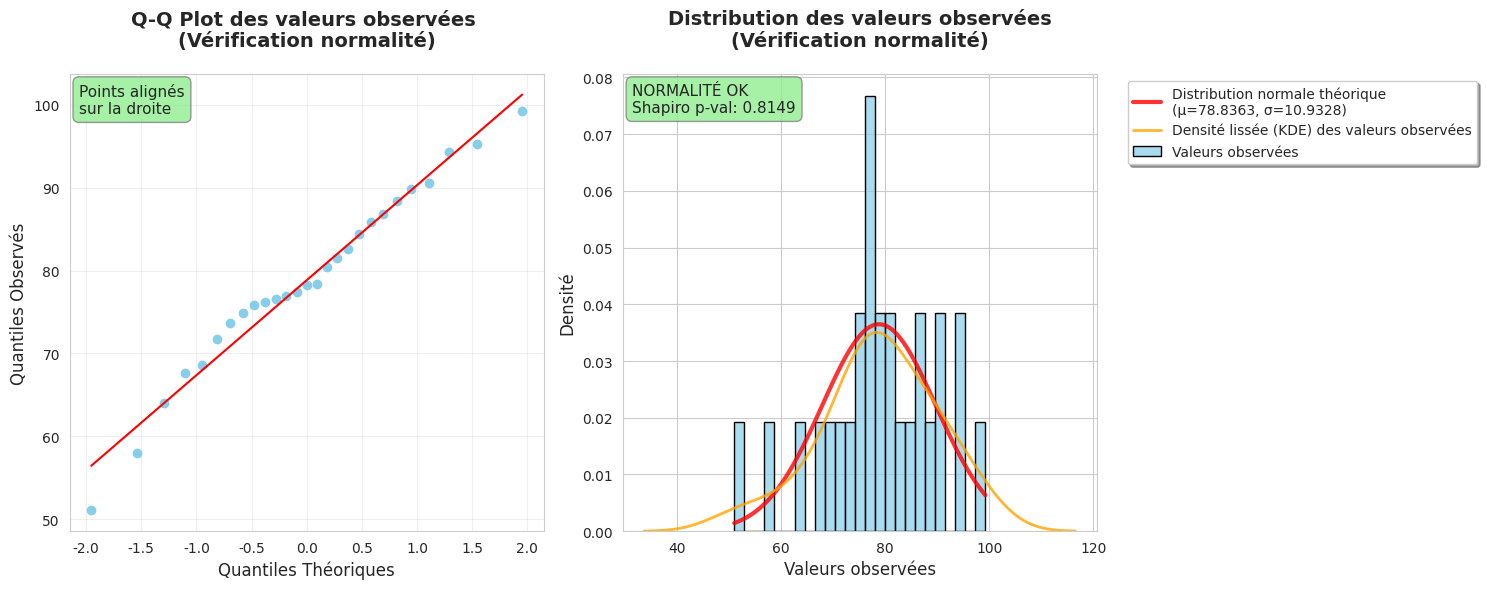

In [63]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec scipy pour contrôler les couleurs
from scipy.stats import probplot
probplot(df[df['traitement']=='A']['mesure'], dist="norm", plot=axes[0])

# Changer les couleurs des points et de la ligne
axes[0].get_lines()[0].set_markerfacecolor('skyblue')
axes[0].get_lines()[0].set_markeredgecolor('skyblue')
axes[0].get_lines()[1].set_color('red')

axes[0].set_title('Q-Q Plot des valeurs observées \n(Vérification normalité)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
axes[0].set_ylabel('Quantiles Observés', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(df[df['traitement']=='A']['mesure'])

# Ajout d'une interprétation avec style Seaborn
if shapiro_pvalue > 0.05:
    interpretation_qq = "Points alignés\nsur la droite"
    box_color = "lightgreen"
else:
    interpretation_qq = "Déviations\nnotables"
    box_color = "lightcoral"

axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color, alpha=0.8, edgecolor='gray'))

# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS AVEC SEABORN (POSITION 1)
# =============================================================================

# Histogramme avec Seaborn - plus esthétique
sns.histplot(data=df[df['traitement']=='A']['mesure'], bins=25, stat='density', alpha=0.7,
             color='skyblue', edgecolor='black', ax=axes[1],
             label='Valeurs observées')

axes[1].set_title('Distribution des valeurs observées\n(Vérification normalité)',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Valeurs observées', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(df[df['traitement']=='A']['mesure']), np.std(df[df['traitement']=='A']['mesure'])
x_norm = np.linspace(df[df['traitement']=='A']['mesure'].min(), df[df['traitement']=='A']['mesure'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Ligne de distribution normale avec style Seaborn
axes[1].plot(x_norm, y_norm, color='red', linewidth=3,
             label=f'Distribution normale théorique\n(μ={mu:.4f}, σ={sigma:.4f})', alpha=0.8)

# Ajout optionnel d'une courbe KDE
sns.kdeplot(data=df[df['traitement']=='A']['mesure'], color='orange', linewidth=2,
            alpha=0.8, ax=axes[1], label='Densité lissée (KDE) des valeurs observées')

# Légende positionnée à l'extérieur du graphique (à droite)
axes[1].legend(fontsize=10, frameon=True, fancybox=True, shadow=True,
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Interprétation avec couleurs conditionnelles
if shapiro_pvalue > 0.05:
    interpretation_dist = "NORMALITÉ OK"
    box_color_dist = "lightgreen"
else:
    interpretation_dist = "NON-NORMALITÉ"
    box_color_dist = "lightcoral"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color_dist, alpha=0.8, edgecolor='gray'))

# Style final
plt.tight_layout()
plt.savefig('test_normality_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# **Pour le traitement B:**

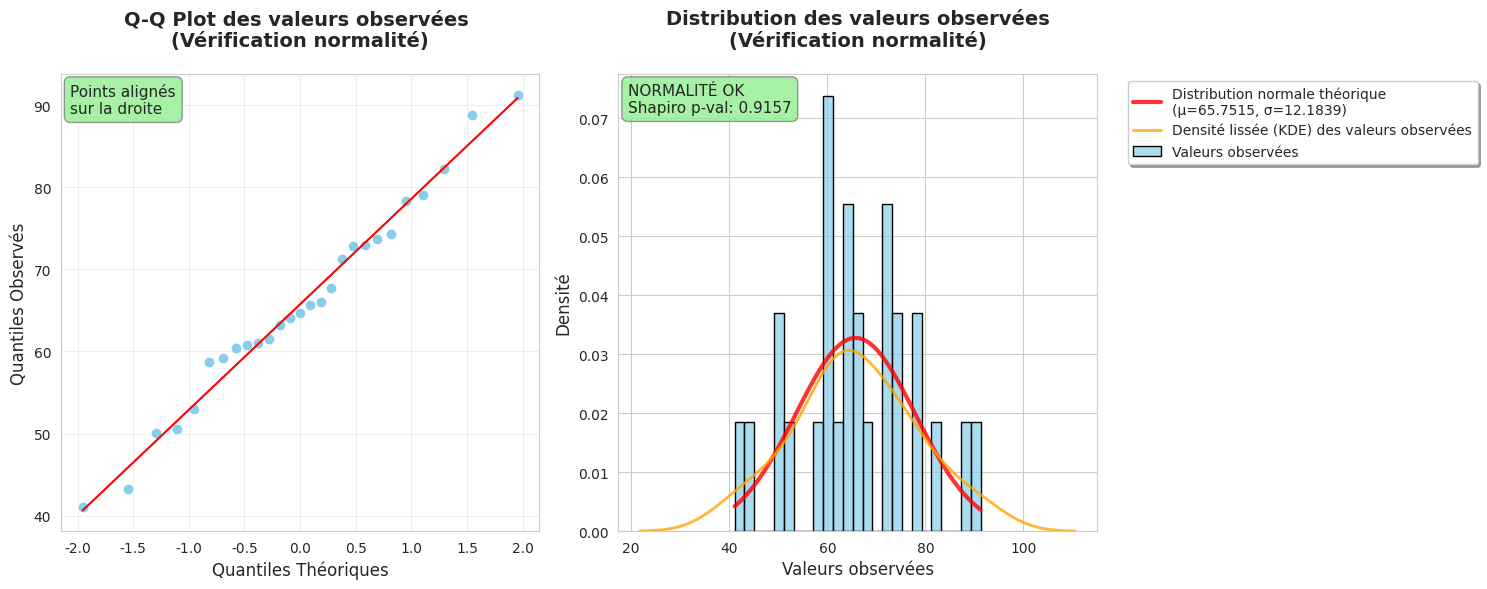

In [64]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec scipy pour contrôler les couleurs
from scipy.stats import probplot
probplot(df[df['traitement']=='B']['mesure'], dist="norm", plot=axes[0])

# Changer les couleurs des points et de la ligne
axes[0].get_lines()[0].set_markerfacecolor('skyblue')
axes[0].get_lines()[0].set_markeredgecolor('skyblue')
axes[0].get_lines()[1].set_color('red')

axes[0].set_title('Q-Q Plot des valeurs observées \n(Vérification normalité)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
axes[0].set_ylabel('Quantiles Observés', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(df[df['traitement']=='B']['mesure'])

# Ajout d'une interprétation avec style Seaborn
if shapiro_pvalue > 0.05:
    interpretation_qq = "Points alignés\nsur la droite"
    box_color = "lightgreen"
else:
    interpretation_qq = "Déviations\nnotables"
    box_color = "lightcoral"

axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color, alpha=0.8, edgecolor='gray'))

# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS AVEC SEABORN (POSITION 1)
# =============================================================================

# Histogramme avec Seaborn - plus esthétique
sns.histplot(data=df[df['traitement']=='B']['mesure'], bins=25, stat='density', alpha=0.7,
             color='skyblue', edgecolor='black', ax=axes[1],
             label='Valeurs observées')

axes[1].set_title('Distribution des valeurs observées\n(Vérification normalité)',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Valeurs observées', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(df[df['traitement']=='B']['mesure']), np.std(df[df['traitement']=='B']['mesure'])
x_norm = np.linspace(df[df['traitement']=='B']['mesure'].min(), df[df['traitement']=='B']['mesure'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Ligne de distribution normale avec style Seaborn
axes[1].plot(x_norm, y_norm, color='red', linewidth=3,
             label=f'Distribution normale théorique\n(μ={mu:.4f}, σ={sigma:.4f})', alpha=0.8)

# Ajout optionnel d'une courbe KDE
sns.kdeplot(data=df[df['traitement']=='B']['mesure'], color='orange', linewidth=2,
            alpha=0.8, ax=axes[1], label='Densité lissée (KDE) des valeurs observées')

# Légende positionnée à l'extérieur du graphique (à droite)
axes[1].legend(fontsize=10, frameon=True, fancybox=True, shadow=True,
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Interprétation avec couleurs conditionnelles
if shapiro_pvalue > 0.05:
    interpretation_dist = "NORMALITÉ OK"
    box_color_dist = "lightgreen"
else:
    interpretation_dist = "NON-NORMALITÉ"
    box_color_dist = "lightcoral"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color_dist, alpha=0.8, edgecolor='gray'))

# Style final
plt.tight_layout()
plt.savefig('test_normality_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Test de Fisher-Snedecor d’égalité de 2 variances

Le test de Fisher-Snedecor, également appelé test F, est utilisé pour comparer l'égalité de deux variances. Il permet de déterminer si les variances de deux échantillons sont significativement différentes ou non.

Les hypothèses du test de Fisher-Snedecor d'égalité de 2 variances sont les suivantes :

$H_0$ : Les deux échantillons ont des variances égales.

$H_1$ : Les deux échantillons ont des variances différentes.


In [65]:
Varriance_traitement_A=np.var(df[df['traitement']=='A']['mesure'],ddof=1)
Varriance_traitement_B=np.var(df[df['traitement']=='B']['mesure'],ddof=1)

if Varriance_traitement_A>Varriance_traitement_B:

  F=Varriance_traitement_A/Varriance_traitement_B
  ddn=len(df[df['traitement']=='A']['mesure'])-1
  ddd=len(df[df['traitement']=='B']['mesure'])-1
  p=(1-stats.f.cdf(F,ddn,ddd))*2
  print('stat=%.3f, p_value=%.3f,ddn=%.0f,ddd=%.0f' % (F,p,ddn,ddd))
else:
  F=Varriance_traitement_B/Varriance_traitement_A
  ddn=len(df[df['traitement']=='B']['mesure'])-1
  ddd=len(df[df['traitement']=='A']['mesure'])-1
  p=(1-stats.f.cdf(F,ddn,ddd))*2
  print('stat=%.3f, p_value=%.3f,ddn=%.0f,ddd=%.0f' % (F,p,ddn,ddd))

stat=1.242, p_value=0.585,ddn=26,ddd=26


La valeur de la statistique du test de Fisher-Snedecor est égale à 1,242. Sous $H_0$, elle suit une loi de Fisher-Snedecor de paramètres (26, 26). La p-value est égale à 0,585, ce qui est supérieur à 0,05. Nous acceptons donc $H_0$ et nous concluons que les deux échantillons ont la même variance. Cela signifie que la dispersion des valeurs à l'intérieur de chaque échantillon est similaire dans les deux échantillons.


Toutes les conditions d’application du test t de Student unilatéral supérieur sont vérifiés. Donc nous pouvons maintenant effectuer le test pour savoir si la nouvelle molécule est efficace pour faire augmenter ou pas la mesure physiologique pour les patients porteurs de la pathologie.

# **Résultats du test:**

In [66]:
from scipy import stats
STATS,PV=stats.ttest_ind(df[df['traitement']=='A']['mesure'],df[df['traitement']=='B']['mesure'],alternative='greater')
# Calcul des degrés de liberté
ddl_ = len(df[df['traitement']=='A']['mesure']) + len(df[df['traitement']=='B']['mesure']) - 2
dicte_ttest_ind={'Statistique de test':STATS,'P-Value':PV,'Degrés de liberté': [ddl_]}
ttest_ind1=pd.DataFrame(dicte_ttest_ind,index=["Test t de Student"])
ttest_ind1

,Statistique de test,P-Value,Degrés de liberté
Test t de Student,4.075752,0.000079,52


La statistique de décision vaut 4.08. Sous $H_0$, elle suit une loi de Student à 52 degrés de libertés. La p-value est largement inférieur à 0.0001 donc inférieur à 0.05. Nous acceptons $H_1$ et nous concluons que la nouvelle molécule est efficace pour faire augmenter la mesure physiologique pour les patients porteurs de la pathologie.

# **Conclusion**

On constate que la molécule testée n’est pas efficace pour baisser la mesure physiologique pour les patients porteurs de la pathologie en question. Il serait judicieux pour l'entreprise pharmaceutique de se tourner vers d'autres molécules pour trouver un traitement plus efficace. corrige les fautes